<a href="https://colab.research.google.com/github/ptanhdnn/read_Spe/blob/master/Multi_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [3]:
data = pd.read_csv("/content/spectra.csv")

X = data.drop(["Cs_137","Co_60","Am_241","RGU","RGTh","RGK"], axis = 1)
Y = data.loc[:,['Cs_137','Co_60','Am_241','RGU','RGTh','RGK']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 18)
id_name = X_train["File_name"]

X_train_drop = X_train.drop(["File_name"], axis = 1)
X_test_drop = X_test.drop(["File_name"], axis = 1)

# Normalization

vector_train = X_train_drop.values

scaler = MinMaxScaler()
scaler.fit(vector_train.T)
scaler_rows = scaler.transform(vector_train.T).T
X_train_scaler = pd.DataFrame(data = scaler_rows, columns = X_train_drop.columns)
X_test_scaler = pd.DataFrame(data = scaler.fit_transform(X_test_drop.values.T).T, columns = X_test_drop.columns)

Encode_y

In [4]:
index_train = y_train.index
index_test  = y_test.index

# y_train_list
encode_list_train = []
encode_list_test  = []
def encode_string(lst):
  string = ''
  string = ''.join(str(element) for element in lst)
  return string

def decode_list(string):
  lst = list(string.split(''))
  return lst

for i in range(len(index_train)):
  row = y_train.iloc[i].tolist()
  encode_list_train.append(encode_string(row))

for i in range(len(index_test)):
  rw = y_test.iloc[i].tolist()
  encode_list_test.append(encode_string(rw))

encode_y_train = pd.DataFrame(data = encode_list_train, index = index_train)
encode_y_test  = pd.DataFrame(data = encode_list_test, index = index_test)

Decision Tree Algorithm

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix

clf2 = DecisionTreeClassifier(random_state= 18, max_depth= 6)
clf2.fit(X_train_scaler, encode_y_train)
y_pred = clf2.predict(X_test_scaler)

y_train_pred = clf2.predict(X_train_scaler)

text_representation = tree.export_text(clf2)

print(text_representation)

print(accuracy_score(encode_y_train, y_train_pred), round(accuracy_score(encode_list_test, y_pred),2))

|--- feature_478 <= 0.55
|   |--- feature_681 <= 0.03
|   |   |--- feature_491 <= 0.01
|   |   |   |--- feature_677 <= 0.00
|   |   |   |   |--- feature_1925 <= 0.00
|   |   |   |   |   |--- class: 001000
|   |   |   |   |--- feature_1925 >  0.00
|   |   |   |   |   |--- class: 001001
|   |   |   |--- feature_677 >  0.00
|   |   |   |   |--- class: 011000
|   |   |--- feature_491 >  0.01
|   |   |   |--- feature_169 <= 0.01
|   |   |   |   |--- feature_1749 <= 0.00
|   |   |   |   |   |--- class: 101000
|   |   |   |   |--- feature_1749 >  0.00
|   |   |   |   |   |--- class: 101001
|   |   |   |--- feature_169 >  0.01
|   |   |   |   |--- feature_1551 <= 0.00
|   |   |   |   |   |--- feature_12 <= 0.16
|   |   |   |   |   |   |--- class: 100000
|   |   |   |   |   |--- feature_12 >  0.16
|   |   |   |   |   |   |--- class: 110000
|   |   |   |   |--- feature_1551 >  0.00
|   |   |   |   |   |--- feature_1458 <= 0.00
|   |   |   |   |   |   |--- class: 100001
|   |   |   |   |   |--- f

Random Forest Algorithm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.97
Accuracy: 1.0
              precision    recall  f1-score   support

      000001       1.00      0.94      0.97        18
      000011       0.75      1.00      0.86         3
      001000       1.00      0.89      0.94         9
      001001       0.83      1.00      0.91         5
      010000       1.00      1.00      1.00        20
      011000       1.00      1.00      1.00        15
      100000       1.00      0.83      0.91         6
      100001       0.67      1.00      0.80         2
      101000       1.00      1.00      1.00         6
      101001       1.00      1.00      1.00         7
      110000       1.00      1.00      1.00         9

    accuracy                           0.97       100
   macro avg       0.93      0.97      0.94       100
weighted avg       0.98      0.97      0.97       100



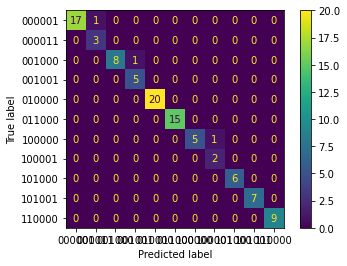

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


forest = RandomForestClassifier(n_estimators = 100, criterion = "entropy",max_features = "log2", random_state = 18, bootstrap = True)
forest.fit(X_train_scaler, encode_y_train)
y_pred2 = forest.predict(X_train_scaler)
y_pred1 = forest.predict(X_test_scaler)

plot_confusion_matrix(forest, X_test_scaler, encode_y_test)
print("Accuracy:",metrics.accuracy_score(encode_list_test, y_pred1))
print("Accuracy:",metrics.accuracy_score(encode_list_train, y_pred2))
print(classification_report(encode_list_test, y_pred1))

XGBoost Algorithm

In [7]:
from xgboost.sklearn import XGBModel
import xgboost as xgb
from xgboost import plot_tree
from sklearn import metrics

xgb_model = xgb.XGBClassifier(objective = "multi:softprob", n_estimators = 200, max_depth = 2, learning_rate = 0.04, random_state = 18)
xgb_model.fit(X_train_scaler, encode_y_train)

y_pred = xgb_model.predict(X_test_scaler)

print("Accuracy:",metrics.accuracy_score(encode_list_test, y_pred))
print(classification_report(encode_list_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.95
              precision    recall  f1-score   support

      000001       1.00      0.94      0.97        18
      000011       0.75      1.00      0.86         3
      001000       0.80      0.89      0.84         9
      001001       0.83      1.00      0.91         5
      010000       1.00      0.90      0.95        20
      011000       0.94      1.00      0.97        15
      100000       1.00      1.00      1.00         6
      100001       1.00      1.00      1.00         2
      101000       1.00      1.00      1.00         6
      101001       1.00      1.00      1.00         7
      110000       1.00      0.89      0.94         9

    accuracy                           0.95       100
   macro avg       0.94      0.97      0.95       100
weighted avg       0.96      0.95      0.95       100



Build model Neural network

In [8]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion="entropy")
#clf = MultiOutputClassifier(forest)
forest.fit(X_train_scaler, y_train)
y_pred = forest.predict(X_test_scaler)
y_pred_train = forest.predict(X_train_scaler)
y_pred
#print("Accuracy of prediction data:",sklearn.metrics.accuracy_score(y_test, y_pred))
#print("Accuracy of training data:",metrics.accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))
#from sklearn import metrics
#multilabel_confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.98      0.99        44
           2       1.00      1.00      1.00        42
           3       0.00      0.00      0.00         0
           4       0.75      1.00      0.86         3
           5       0.95      1.00      0.97        35

   micro avg       0.98      0.99      0.99       154
   macro avg       0.78      0.83      0.80       154
weighted avg       0.98      0.99      0.99       154
 samples avg       0.98      0.99      0.99       154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
